# US_Census Data Cleaning
**Situation:** You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn't use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

**Source of files:** Codeacademy

# Inspect the data:


**Import the libraries needed for data inspection**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import warnings
warnings.filterwarnings('ignore')

**Glob is used to read nine different files**

In [2]:
files = glob.glob("states*.csv",recursive = True)

df_list = []

for file in files:
    data = pd.read_csv(file,index_col = 0 )
    df_list.append(data)
print(f'File names : {files}')

df = pd.concat(df_list)

File names : ['states0.csv', 'states1.csv', 'states2.csv', 'states3.csv', 'states4.csv', 'states5.csv', 'states6.csv', 'states7.csv', 'states8.csv', 'states9.csv']


In [3]:
#Get the first five rows od data.
df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


In [4]:
#Get the data types of different columns.
df.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

In [5]:
#Decribe the dimension of dataset (60 columns and 10 rows)
df.shape

(60, 10)

**Columns from Hispanic to Pacific are of different races in the United States of America.**
The data type for these columns is **object**. To perform further analysis we will need to convert it to either **int** or **float**.

The steps to carry out the conversion are:
1. Remove "%" by using str.split('charachter').
2. Use indexing to obtaine the desired value in our columns.
3. Use pandas to_numeric function to convert all columns to float data type.

In [6]:
#Function to perform string operation on all columns represting different races.
def race():
    for i in df.columns[2:8]:
        split = df[i].str.split('%')
        df[i] = (split.str.get(0))
        df[i] = pd.to_numeric(df[i])
    
race()

In [7]:
#Perform similar opertain on column Income to get rid of '$' and ','
split_Income = df.Income.str.split('$')
df.Income = split_Income.str.get(1)

In [8]:
df['Income'] = df['Income'].str.replace(',','')
df['Income'] = df['Income'].astype(float)

In [9]:
df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093M_2489527F
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160M_349215F
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088M_3342840F
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913M_1506295F
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135M_19334329F


**GenderPop defines male and female population across all states**
1. Convert GenderPop to a numerical data type by performing string operations.
2. Split the population for respective genders into two different columns.

In [10]:
a = df['GenderPop'].str.split('_')
df['Male_Population'] = a.str.get(0)

df['Male_Population']=df['Male_Population'].str.replace('M','')
df['Male_Population'] = pd.to_numeric(df['Male_Population'])

In [11]:
b = df['GenderPop'].str.split('_')
df['Female_Population'] = b.str.get(1)

df['Female_Population']=df['Female_Population'].str.replace('F','')
df['Female_Population'] = pd.to_numeric(df['Female_Population'])

**Create a refined dataframe**

In [12]:
#Drop the column Genderpop from the old dataframe
new_df = df.drop('GenderPop',axis = 1)

In [13]:
#Rename the columns
new_df = new_df.rename(columns = {'TotalPop': 'Total_Population','Male_Population':'Male','Female_Population':'Female'})

In [14]:
new_df.head()

,State,Total_Population,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527.0
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215.0
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840.0
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295.0
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329.0


**Check data types. The data types have changed for column opertions performed.**

In [15]:
new_df.dtypes

State                object
Total_Population      int64
Hispanic            float64
White               float64
Black               float64
Native              float64
Asian               float64
Pacific             float64
Income              float64
Male                  int64
Female              float64
dtype: object

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             60 non-null     object 
 1   Total_Population  60 non-null     int64  
 2   Hispanic          60 non-null     float64
 3   White             60 non-null     float64
 4   Black             60 non-null     float64
 5   Native            60 non-null     float64
 6   Asian             60 non-null     float64
 7   Pacific           55 non-null     float64
 8   Income            60 non-null     float64
 9   Male              60 non-null     int64  
 10  Female            57 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 5.6+ KB


**Eventhough the information on our dataframe shows that there are no null values. We will still deep dive to look if there are any.**

In [17]:
#Check for any null values.
new_df.isnull().any()

State               False
Total_Population    False
Hispanic            False
White               False
Black               False
Native              False
Asian               False
Pacific              True
Income              False
Male                False
Female               True
dtype: bool

In [18]:
#Check for the total of null values.
new_df.isnull().sum()

State               0
Total_Population    0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             5
Income              0
Male                0
Female              3
dtype: int64

In [19]:
#On further investigation we find out that there are 5 null values for Pacific.
new_df['Pacific'][new_df['Pacific'].isnull()]

5   NaN
0   NaN
2   NaN
1   NaN
4   NaN
Name: Pacific, dtype: float64

**Since Pacific represents a percentage of all the races. We take a difference of between total percentage and remainder of the races.**

In [20]:
new_df['Pacific'].fillna(100 - new_df['Hispanic'] - new_df['White'] - new_df['Black'] - new_df['Native'] - new_df['Asian'],inplace = True)

In [21]:
#There are 3 null values for Female population
new_df['Female'][new_df['Female'].isnull()]

5   NaN
0   NaN
1   NaN
Name: Female, dtype: float64

**Fill the null values for Female poputalion by taking the difference between total population and male population.**

In [22]:
new_df['Female'].fillna(new_df['Total_Population'] - new_df['Male'],inplace = True)

In [23]:
#Check for anymore null values. All the null values have already been treated.
new_df.isnull().any()

State               False
Total_Population    False
Hispanic            False
White               False
Black               False
Native              False
Asian               False
Pacific             False
Income              False
Male                False
Female              False
dtype: bool

**Check for any duplicated values.**
There are a total of nine duplicate values in our dataset.

In [24]:
#Calculate the sum of duplicate values
new_df.duplicated().sum()

9

In [25]:
#Drop duplicate values.
new_df.drop_duplicates(keep = 'first',inplace  = True)

In [26]:
#Check for any remeaining duplicate values
new_df.duplicated().any()

False

In [27]:
#Reset the index
new_df = new_df.reset_index(drop = True,inplace = False)

In [28]:
#Convert male and female population to a percantage of the total population
new_df['Male'] = (new_df.Male/new_df.Total_Population)*100
new_df['Female'] = (new_df.Female/new_df.Total_Population)*100

In [29]:
new_df.head()

,State,Total_Population,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,48.463613,51.536387
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,52.382478,47.617522
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,49.670638,50.329362
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,49.080829,50.919171
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,49.678313,50.321687


**Summary Statistics**

In [30]:
new_df.describe()

,Total_Population,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
count,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,6.265067e+06,12.648039,67.261176,11.945098,1.547843,3.645098,0.467647,55922.667255,49.300059,50.699941
std,7.017552e+06,15.697733,18.394281,11.854634,3.105255,5.293489,1.350217,11479.923759,0.829868,0.829868
min,6.266040e+05,1.290000,0.770000,0.090000,0.000000,0.080000,0.000000,20720.540000,47.363950,47.617522
25%,1.860392e+06,4.675000,56.805000,3.055000,0.195000,1.245000,0.030000,48358.540000,48.760701,50.321565
50%,4.397353e+06,8.460000,71.140000,8.200000,0.360000,2.320000,0.050000,54207.820000,49.216153,50.783847
75%,6.845525e+06,13.415000,79.635000,17.370000,1.035000,3.845000,0.140000,63889.835000,49.678435,51.239299
max,3.842146e+07,98.890000,93.980000,51.780000,16.390000,36.590000,8.760000,78765.400000,52.382478,52.636050


**Create distplot to check mean, median, 25th percentile and 75th percentile**

In [31]:
def plot_distplot(df):
    
    for i in new_df.columns[1:11]:
        fig = plt.figure(figsize = (15,5))
    
        sns.distplot(df[i])
    
        mean = df[i].mean()
    
        median = df[i].median()
    
        Q1 =  df[i].quantile(0.25) #25yh percentile
    
        Q3 =  df[i].quantile(0.75) #75th percentile
    

    
        plt.axvline(mean,color = 'red',label = 'Mean')
        plt.axvline(median,color = 'green',label = 'Median')
        plt.axvline(Q1,color = 'yellow',label = '25th_ercentile')
        plt.axvline(Q3,color = 'blue',label = '75th_percentile')
        plt.legend()
        plt.title('Distribution of ' + i,fontstyle = 'italic',fontsize = 12) 
        plt.grid(axis = 'y',linestyle = '--',alpha = 0.5)
        plt.show()

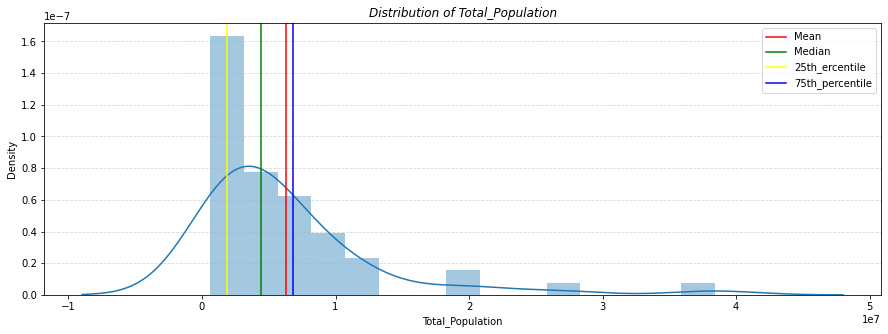

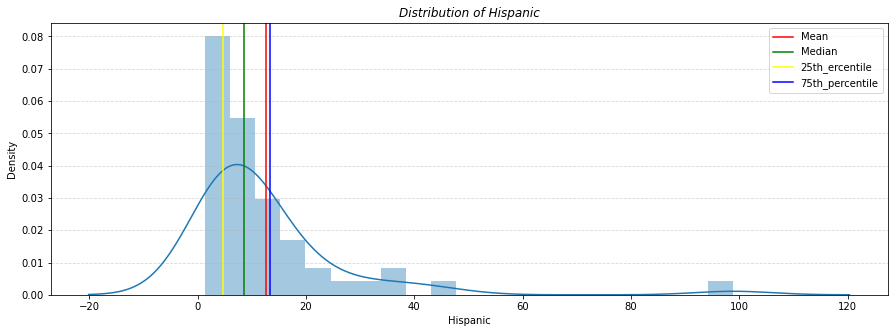

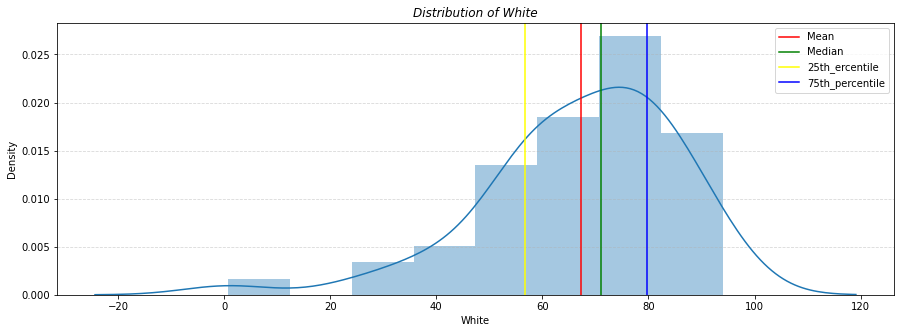

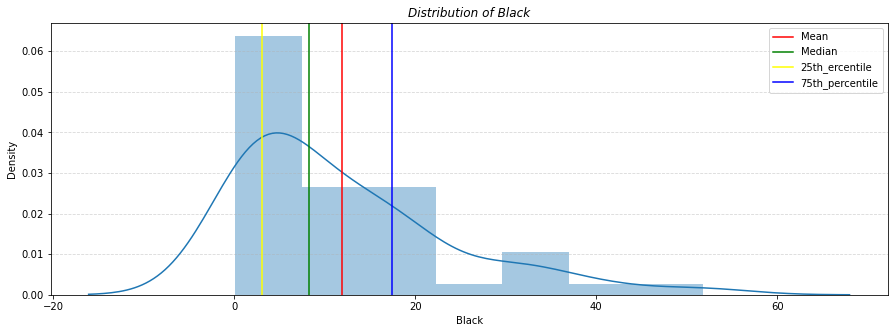

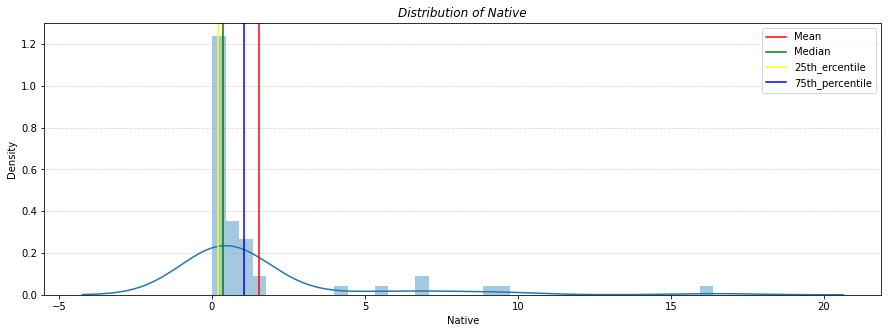

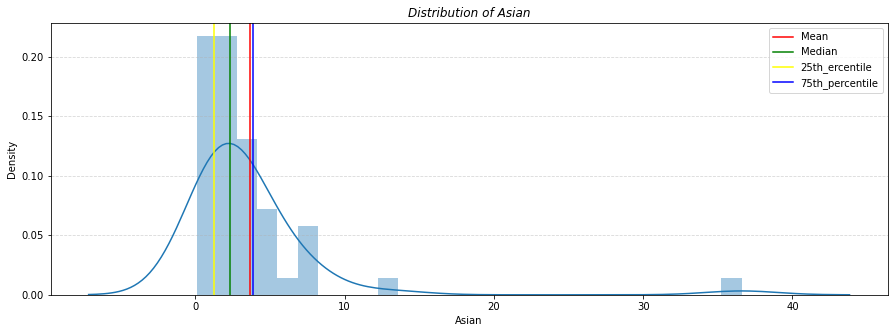

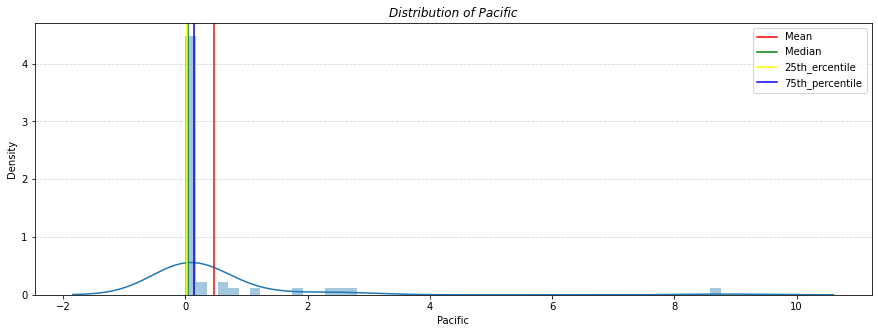

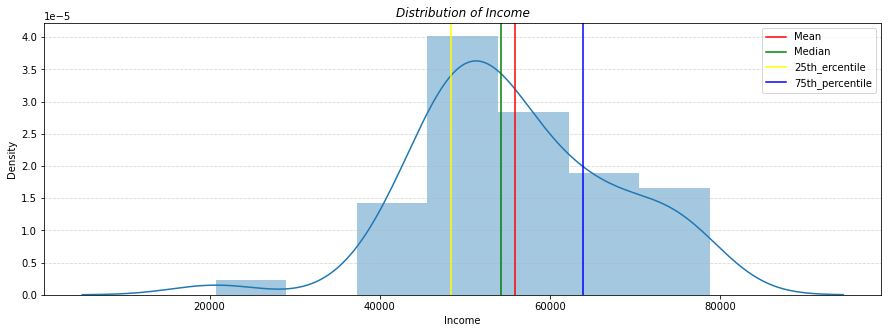

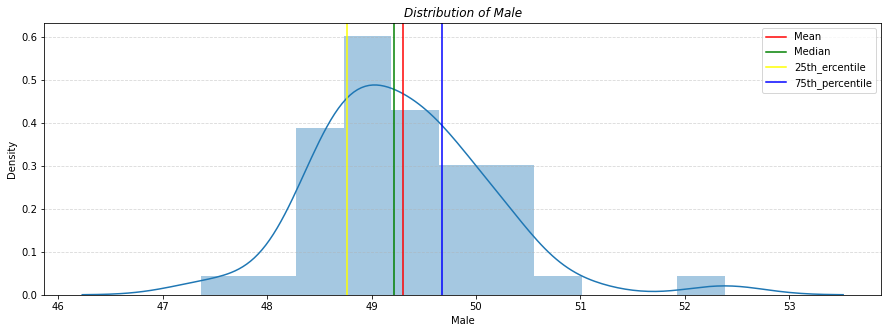

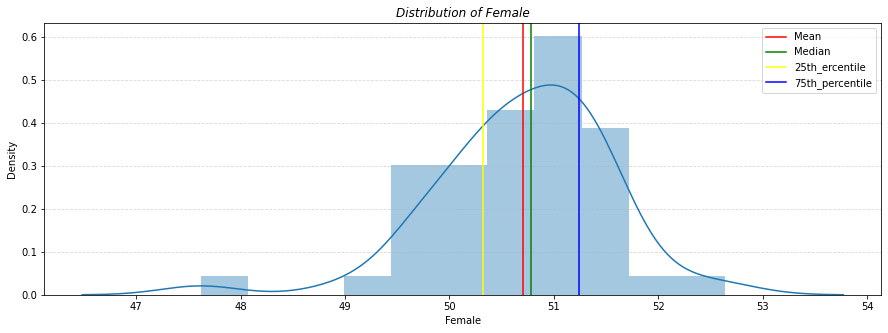

In [32]:
plot_distplot(new_df)

**Create a function for boxplot to identify outliers**

In [33]:
def boxplot_plot(df):
    
    for i in new_df.columns[1:11]:
        fig = plt.figure(figsize = (8,8))
        df.boxplot(column = [i])
        plt.grid(False)
        plt.title(i+ ' population outliers',fontstyle = 'italic')
        plt.grid(axis = 'y',linestyle = '--',alpha = 0.5)
        plt.tight_layout()
        plt.show()

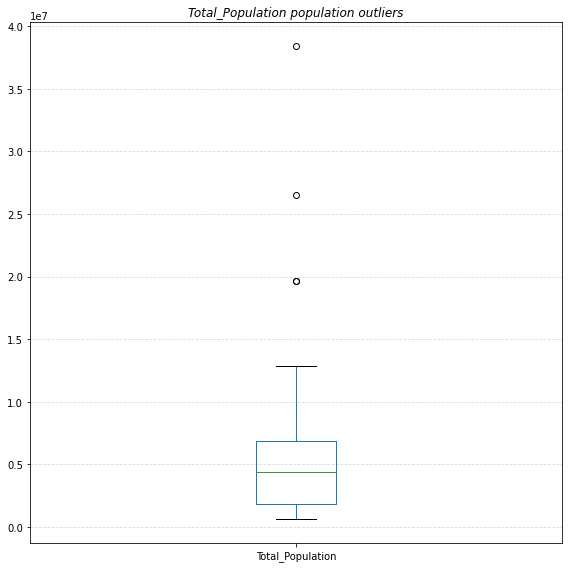

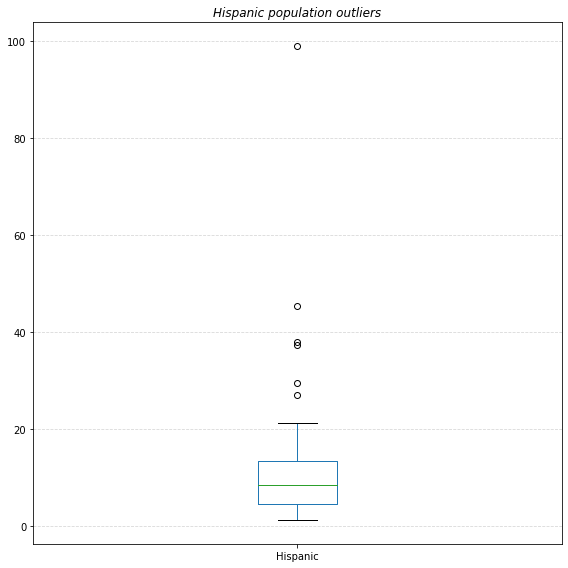

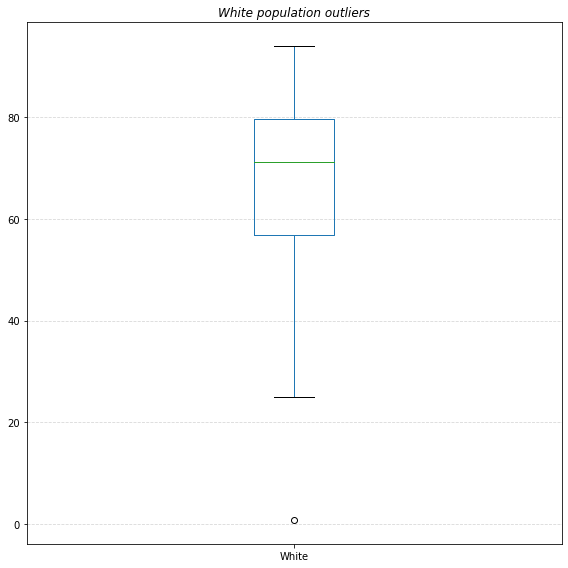

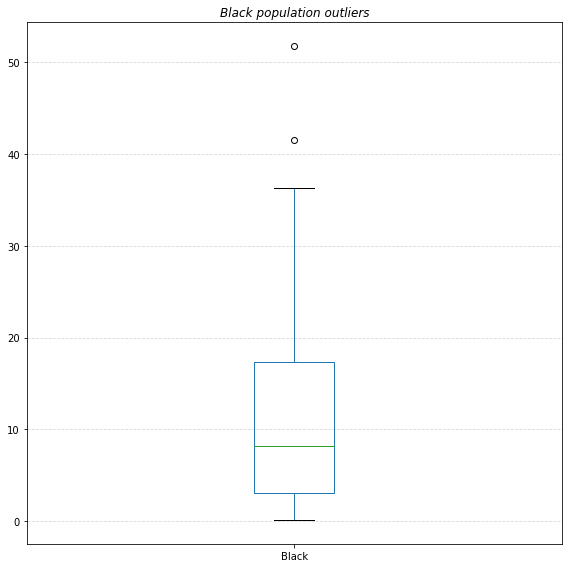

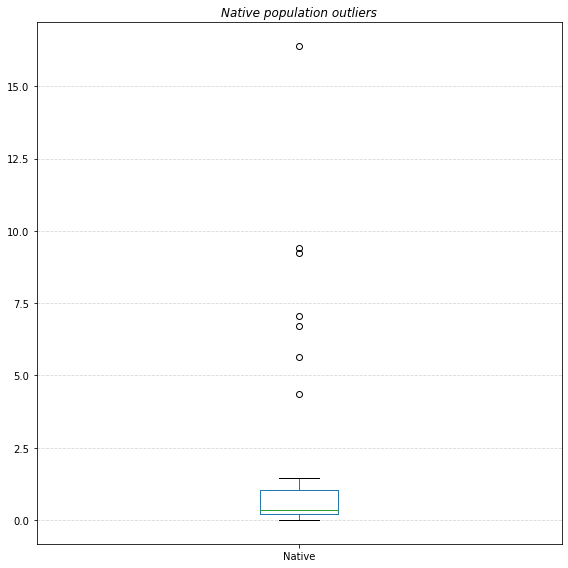

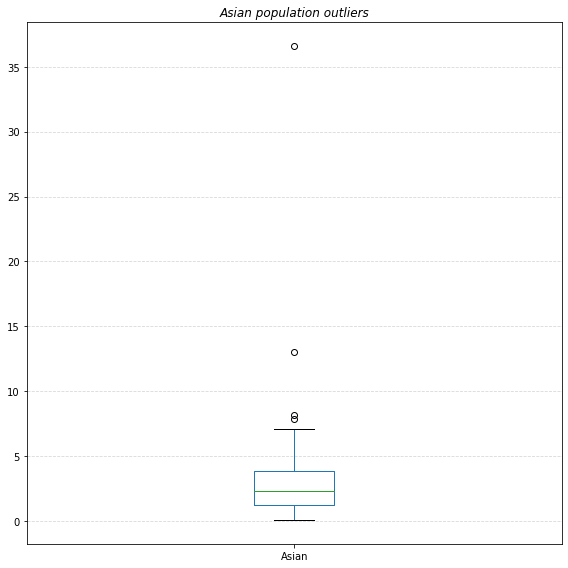

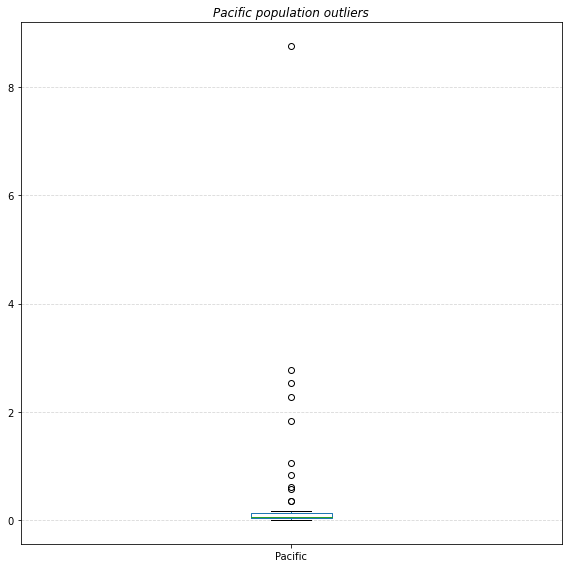

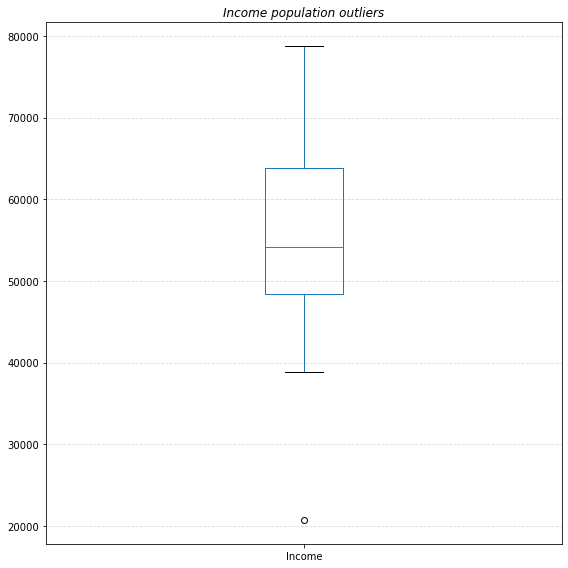

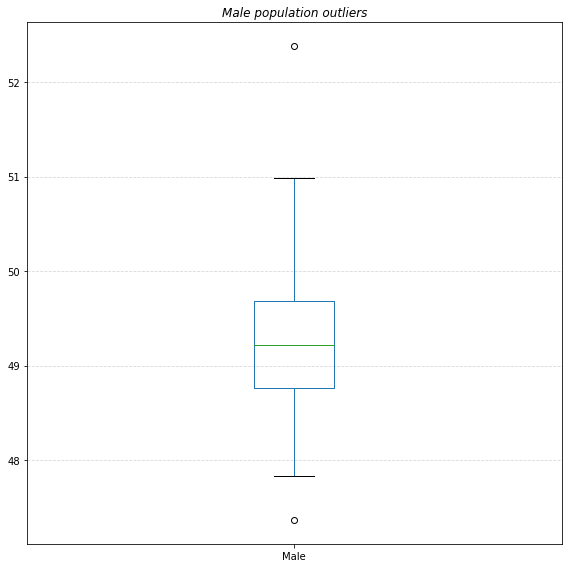

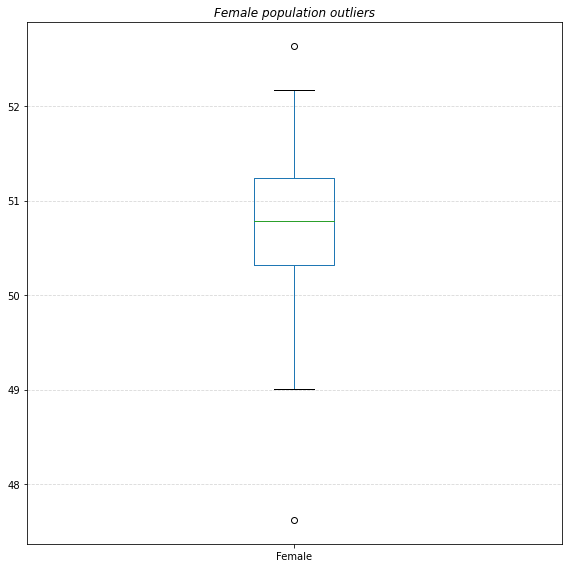

In [34]:
boxplot_plot(new_df)

**TREATMENT OF OUTLIERS**

In [35]:
#Function to determine 25th perecentile,75th percentile ,Inter-Quartile Range.
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25) #25th percentile
    Q3 =df[ft].quantile(0.75)  #75th percentile
    
    IQR = Q3 - Q1 #Inter -Quartile Range
    
    lower_limit = Q1 - 1.5*IQR 
    upper_limit = Q3 + 1.5*IQR
    
    #define a list of indexes that are less than the lower bound or grater than the upper bound of our data.
    
    ls = df.index[(df[ft] < lower_limit) | (df[ft] > upper_limit)]
    
    return ls

#Create an empty list where values from the previous **ls** are added by using extend. We call the function outliers.
index_lst = []
for i in new_df.columns[1:11]:
    index_lst.extend(outliers(new_df,i))
index_lst

#Function will drop the index lists that serve as outliers in our dataset
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    
    return df

#Create an object which will later on be defined as our new dataframe.
df_cleaned = remove(new_df,index_lst)

In [36]:
#Reset Index for the new dataframe.
df_cleaned.reset_index(drop = True,inplace = True)

In [37]:
df_cleaned.head()

,State,Total_Population,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,48.463613,51.536387
1,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,49.080829,50.919171
2,Connecticut,3593222,15.60,67.68,10.35,0.13,4.02,0.02,76146.56,48.747531,51.252469
3,Georgia,10006693,8.42,54.29,32.09,0.19,3.10,0.05,50811.08,48.800648,51.199352
4,Idaho,1616547,11.51,83.14,0.57,1.47,1.14,0.13,48017.32,50.135505,49.864495


In [38]:
#No.of states after removing outliers
df_cleaned['State'].nunique()

28

In [39]:
#No.of statesbefore removing outliers
new_df['State'].nunique()

51

# AFTER OUTLIER TREATMENT:

**Let's us check the outliers for each variable in our dataframe**

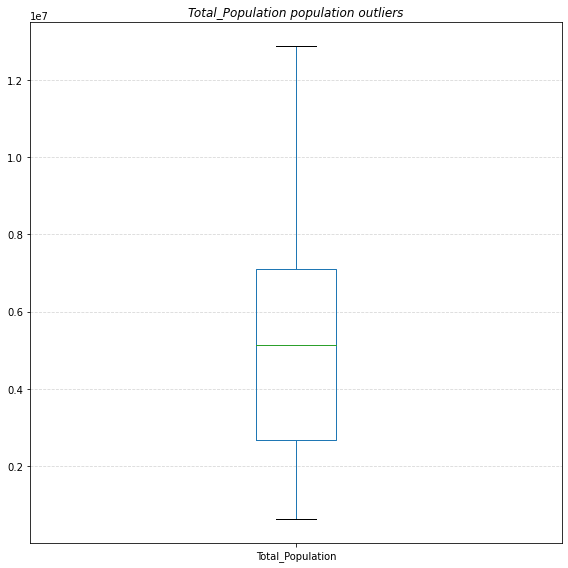

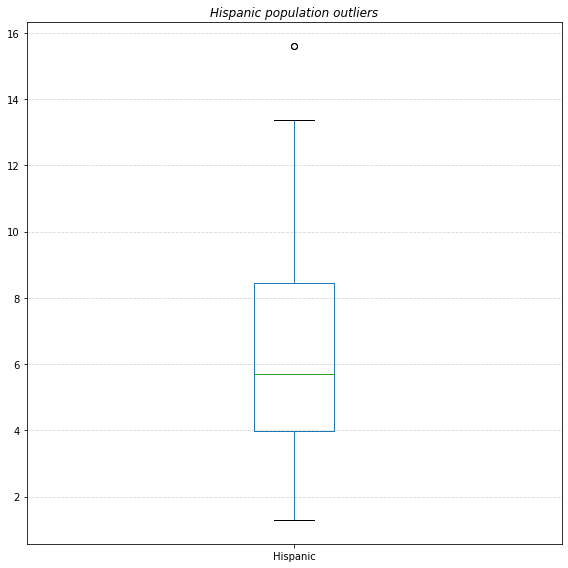

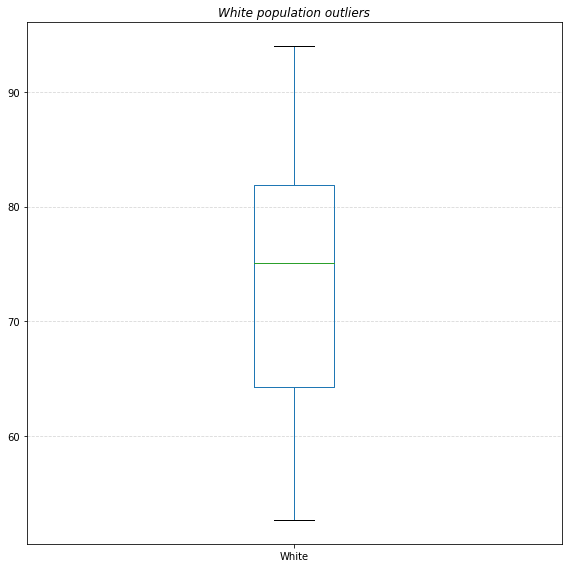

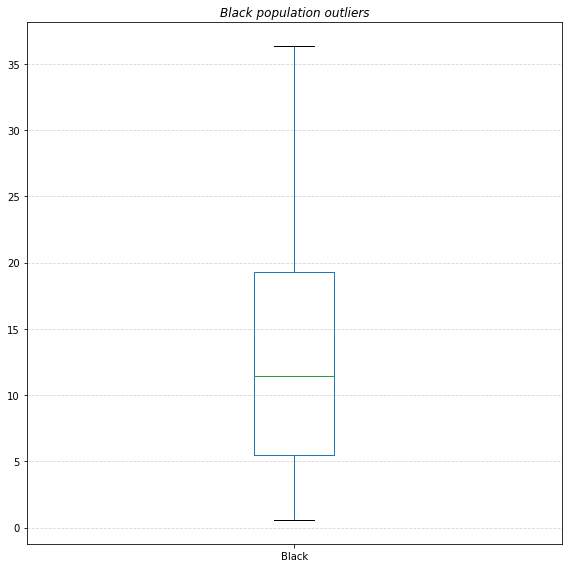

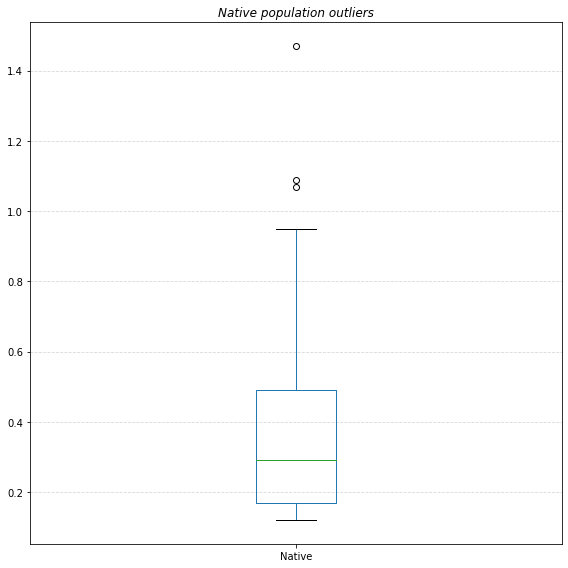

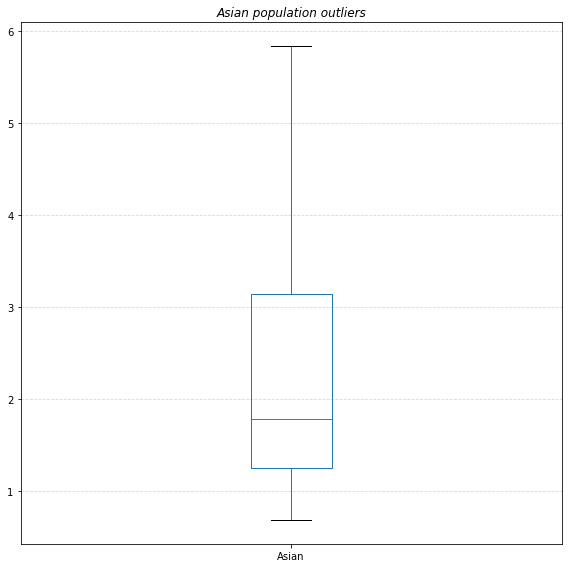

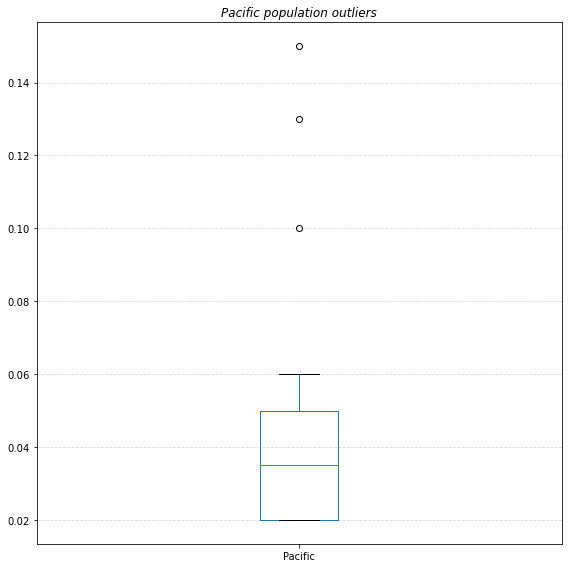

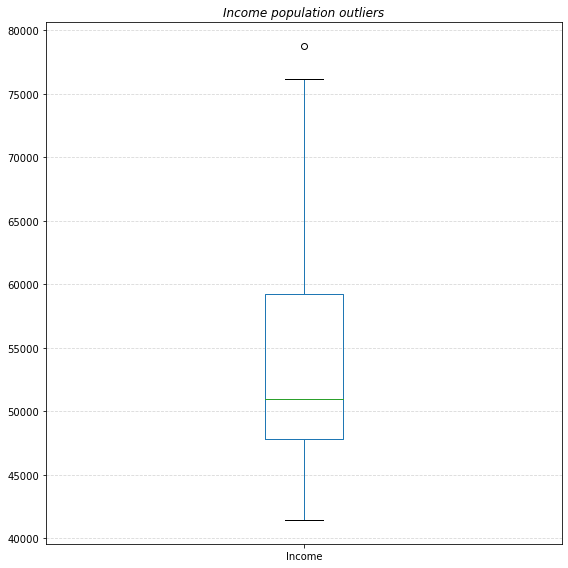

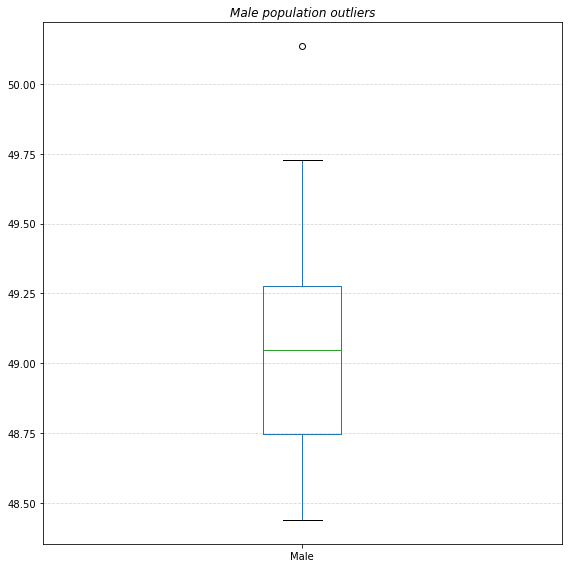

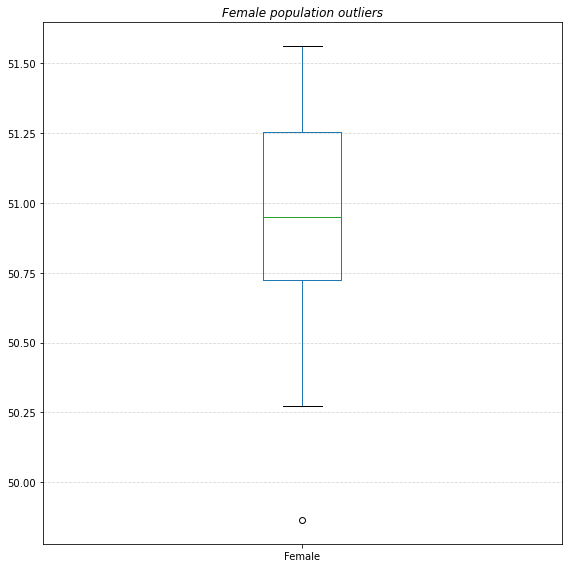

In [40]:
boxplot_plot(df_cleaned)

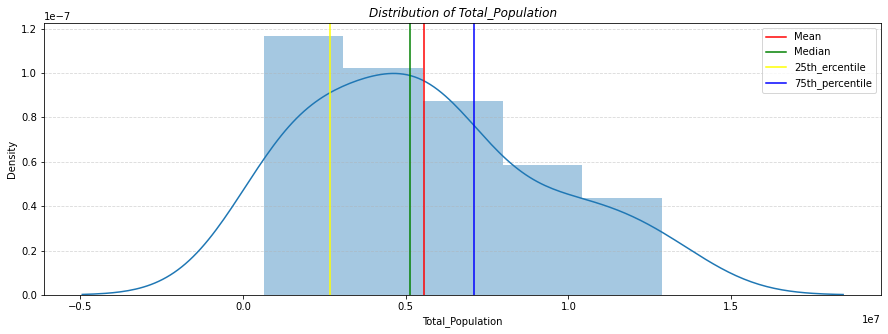

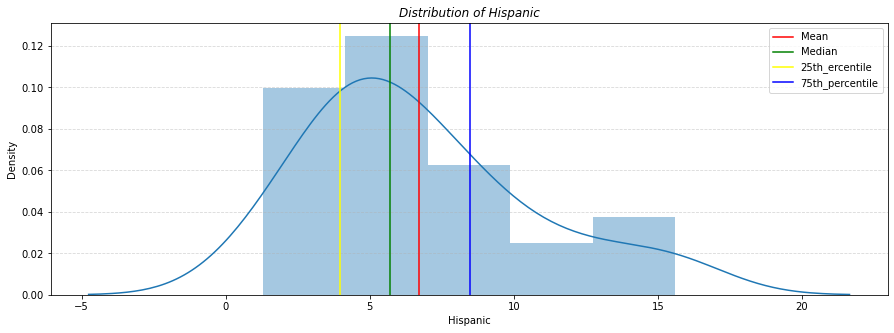

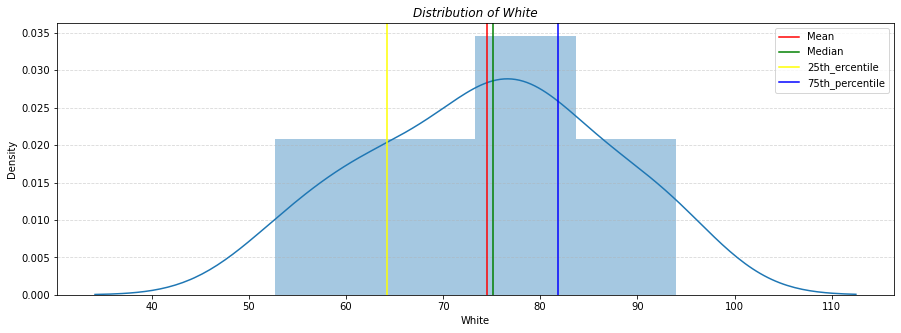

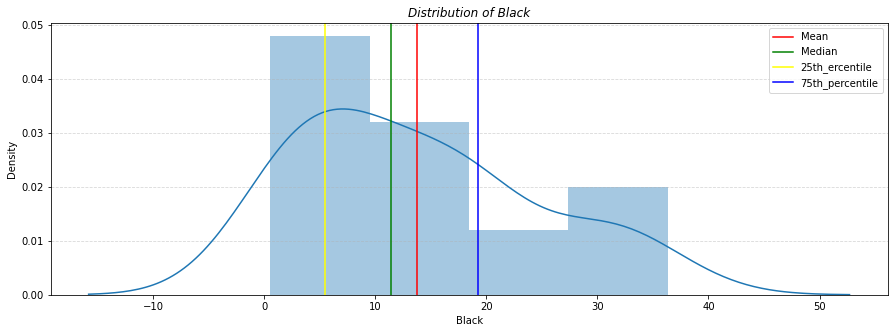

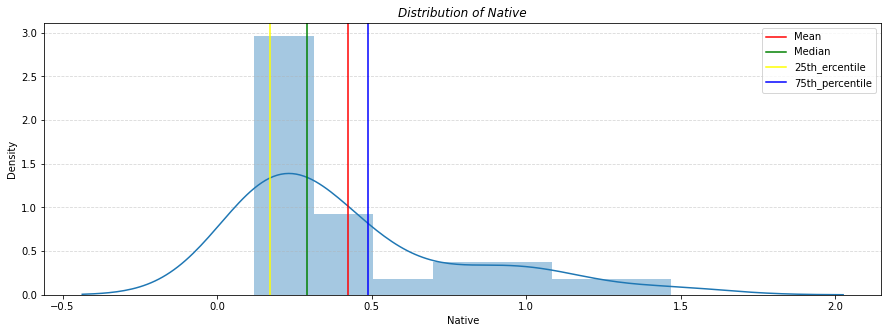

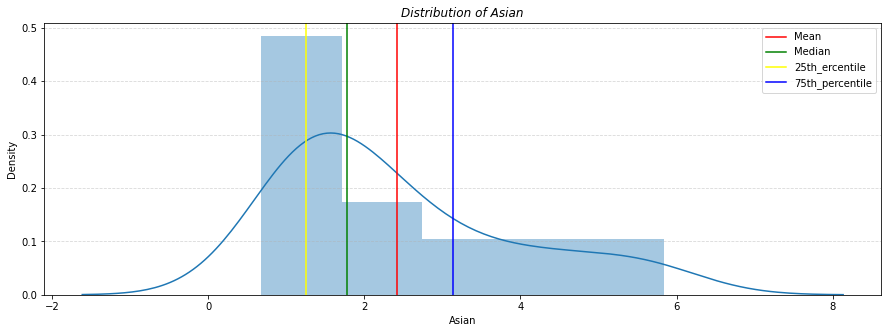

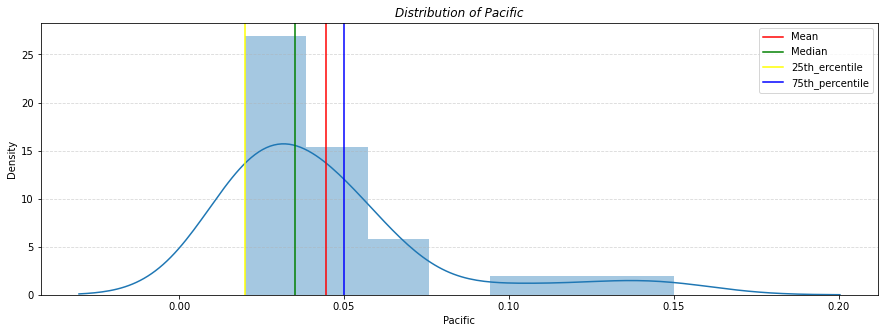

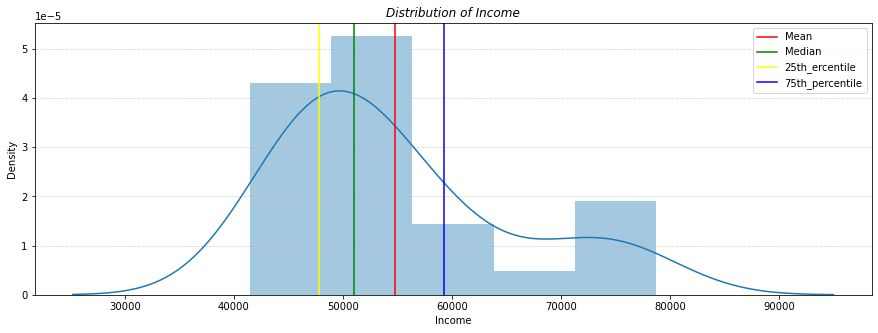

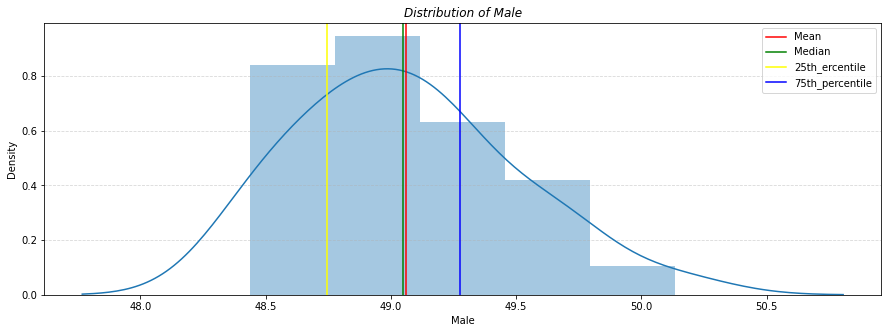

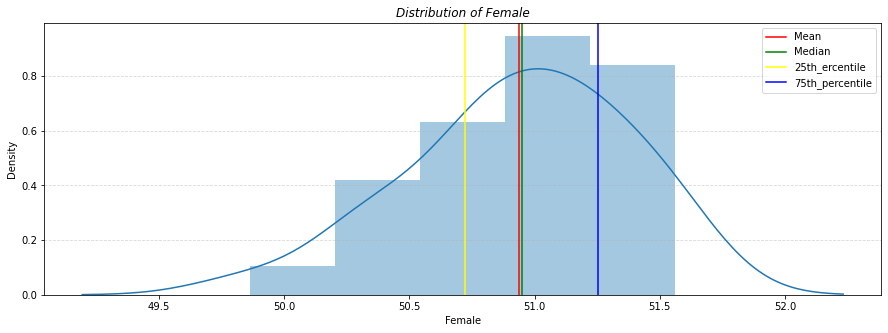

In [41]:
plot_distplot(df_cleaned)

In [42]:
#Summary Statistics for dataset without outliers
df_cleaned.describe()

,Total_Population,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
count,2.800000e+01,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,5.574868e+06,6.704286,74.515714,13.807143,0.425000,2.422500,0.044643,54757.441786,49.060079,50.939921
std,3.616786e+06,3.926898,12.017625,10.624879,0.360981,1.487049,0.032714,10543.609490,0.435110,0.435110
min,6.266040e+05,1.290000,52.680000,0.570000,0.120000,0.680000,0.020000,41437.110000,48.438152,49.864495
25%,2.685997e+06,3.967500,64.267500,5.485000,0.170000,1.247500,0.020000,47845.010000,48.745047,50.723260
50%,5.124896e+06,5.715000,75.115000,11.410000,0.290000,1.780000,0.035000,51006.455000,49.048345,50.951655
75%,7.093347e+06,8.462500,81.857500,19.272500,0.490000,3.137500,0.050000,59240.715000,49.276740,51.254953
max,1.287376e+07,15.600000,93.980000,36.330000,1.470000,5.840000,0.150000,78765.400000,50.135505,51.561848


In [43]:
#Summary statistics for dataset with outliers
new_df.describe()

,Total_Population,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
count,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,6.265067e+06,12.648039,67.261176,11.945098,1.547843,3.645098,0.467647,55922.667255,49.300059,50.699941
std,7.017552e+06,15.697733,18.394281,11.854634,3.105255,5.293489,1.350217,11479.923759,0.829868,0.829868
min,6.266040e+05,1.290000,0.770000,0.090000,0.000000,0.080000,0.000000,20720.540000,47.363950,47.617522
25%,1.860392e+06,4.675000,56.805000,3.055000,0.195000,1.245000,0.030000,48358.540000,48.760701,50.321565
50%,4.397353e+06,8.460000,71.140000,8.200000,0.360000,2.320000,0.050000,54207.820000,49.216153,50.783847
75%,6.845525e+06,13.415000,79.635000,17.370000,1.035000,3.845000,0.140000,63889.835000,49.678435,51.239299
max,3.842146e+07,98.890000,93.980000,51.780000,16.390000,36.590000,8.760000,78765.400000,52.382478,52.636050


In [44]:
#Shape of the dataset before removing outliers
new_df.shape

(51, 11)

In [45]:
#Shape of dataset after removing outliers
df_cleaned.shape

(28, 11)

**Plot a barplot to visualize the different population of races in all states**

In [82]:
#Function for visualizing population (races) in every state
def race_vs_state(df):
    for i in df.columns[2:8]:
        fig = plt.figure(figsize = (18,7))
        race_plot = sns.barplot(df['State'],df[i],palette = 'summer')
        plt.xlabel('State',fontsize = 13)
        plt.ylabel(i,fontsize = 13)
        plt.xticks(rotation = 90)
        plt.title(i + ' population by State',fontsize = 15,fontstyle = 'italic')
        plt.grid(axis = 'y',linestyle = '--',alpha = 0.5)
        plt.bar_label(race_plot.containers[0],size = 8)
        plt.tight_layout()
        plt.show()

## Barplot of population of every race after outliers were removed

**Observations after removing outliers**
<br><br>State with **maximum Hispanic** population : **Connecticut and Illinois**
<br><br>State with **minimum Hispanic** population : **West Virginia**
<br><br>State with **maximum White** population : **Vermont**
<br><br>State with **minimum White** population : **Georgia**
<br><br>State with **maximum Black** population : **Louisiana**
<br><br>State with **minimum Black** population : **Idaho**
<br><br>State with **maximum Native** population : **Idaho**
<br><br>State with **minimum Native** population : **Illinois and Pennsylvania**
<br><br>State with **maximum Asian** population : **Massachusetts**
<br><br>State with **minimum Asian** population : **West Virginia**I
<br><br>State with **maximum Pacific** population : **Arkansas**
<br><br>State with **minimum Pacific** population : **Connecticut, Illinois, Maine, Massachusetts, Michigan, New Hampshire, Ohio,Pennsylvania and Wisconsin**

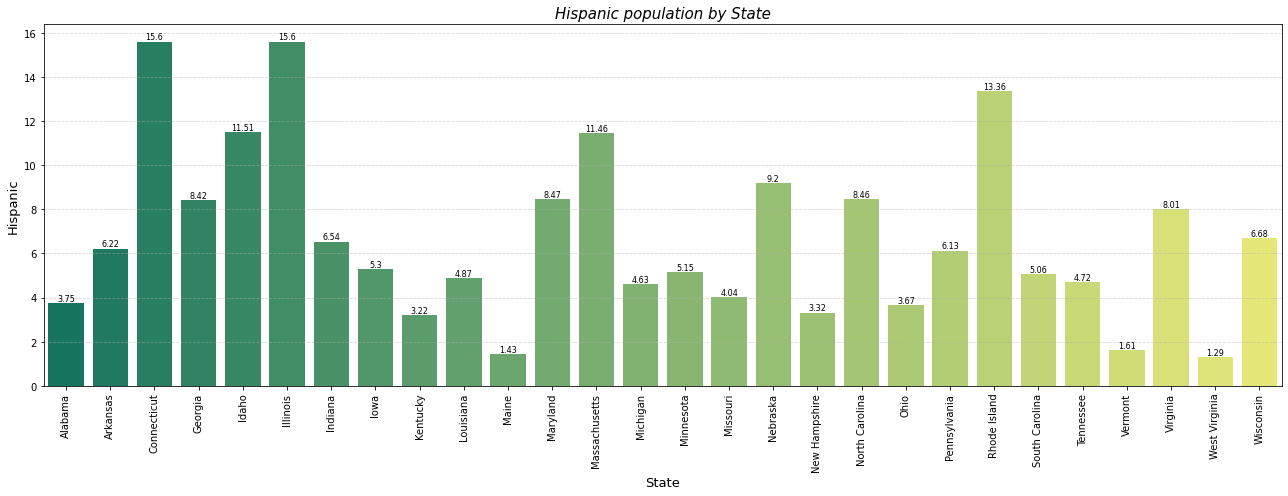

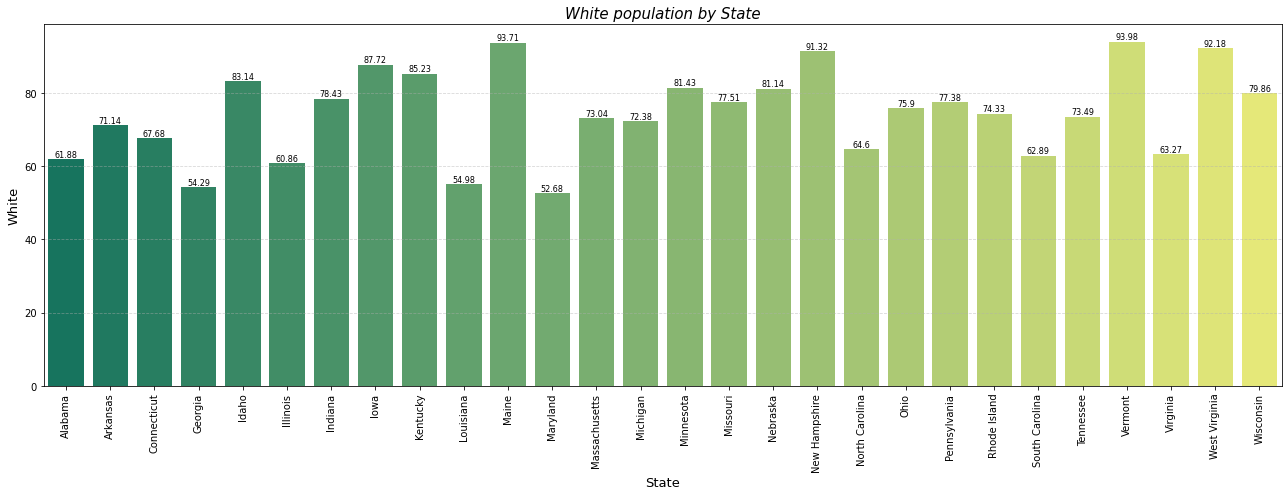

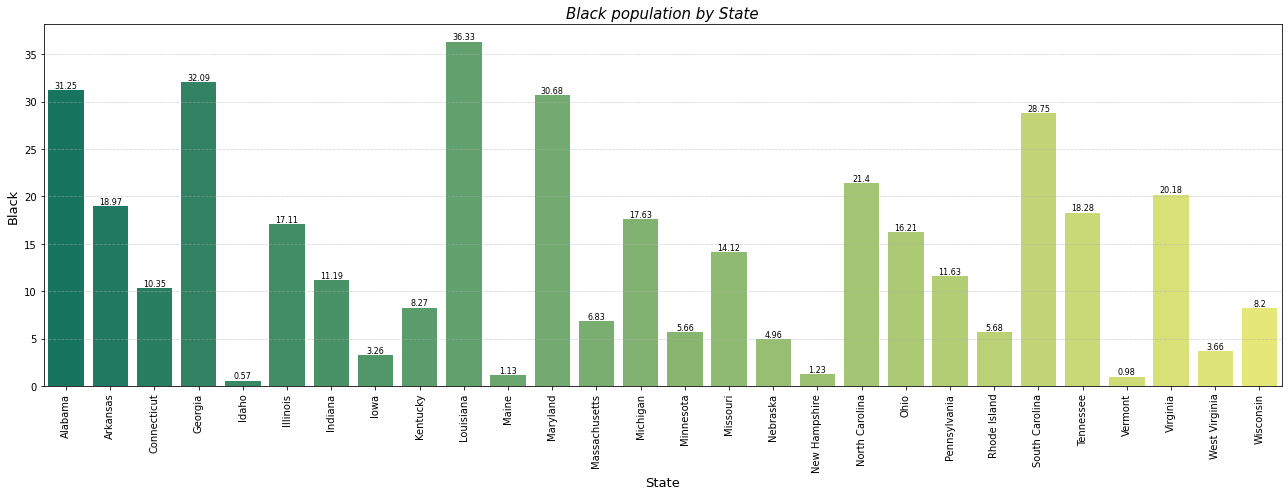

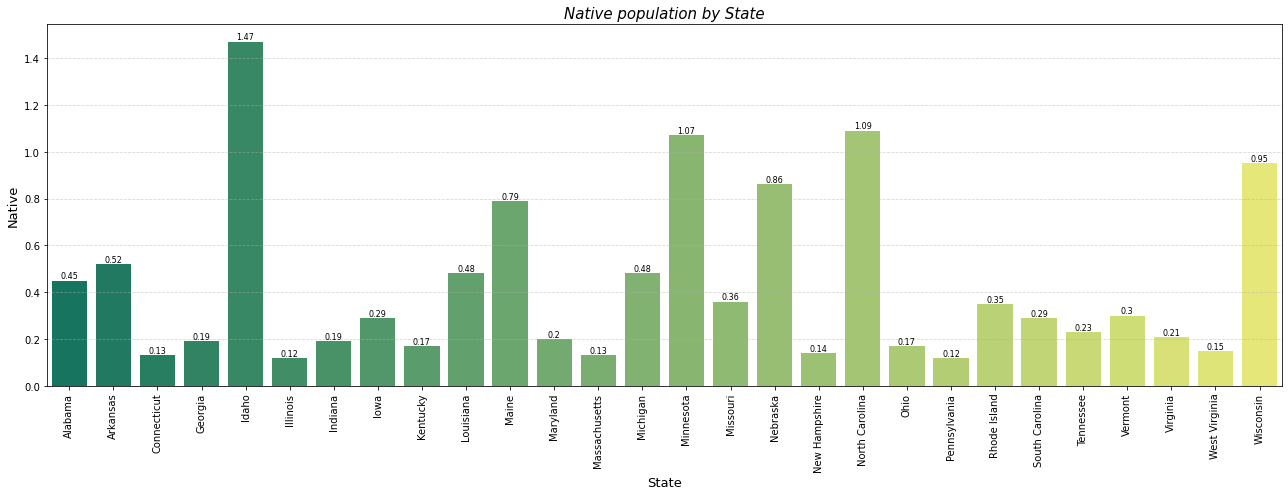

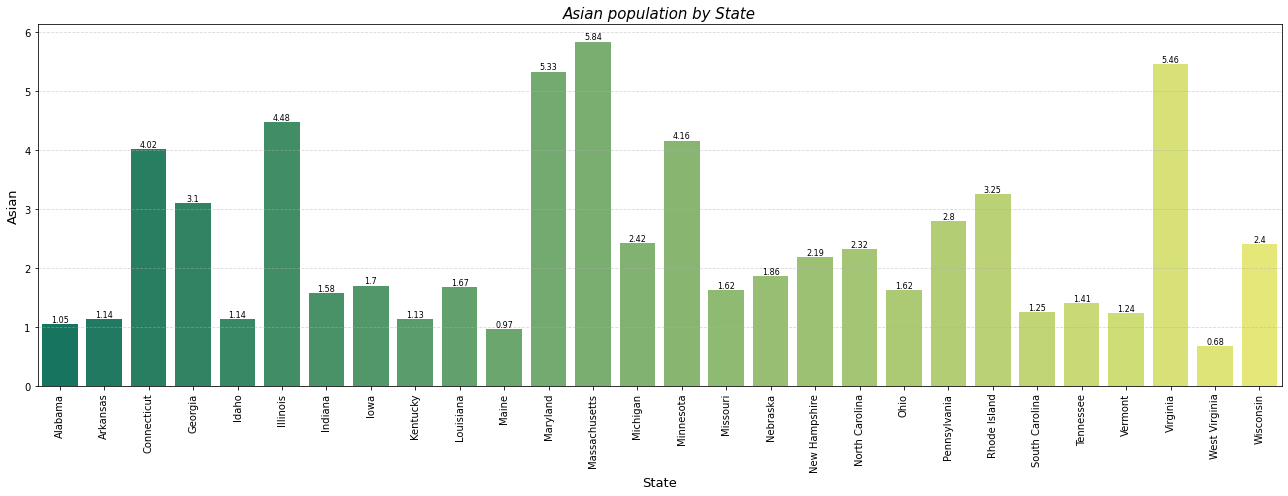

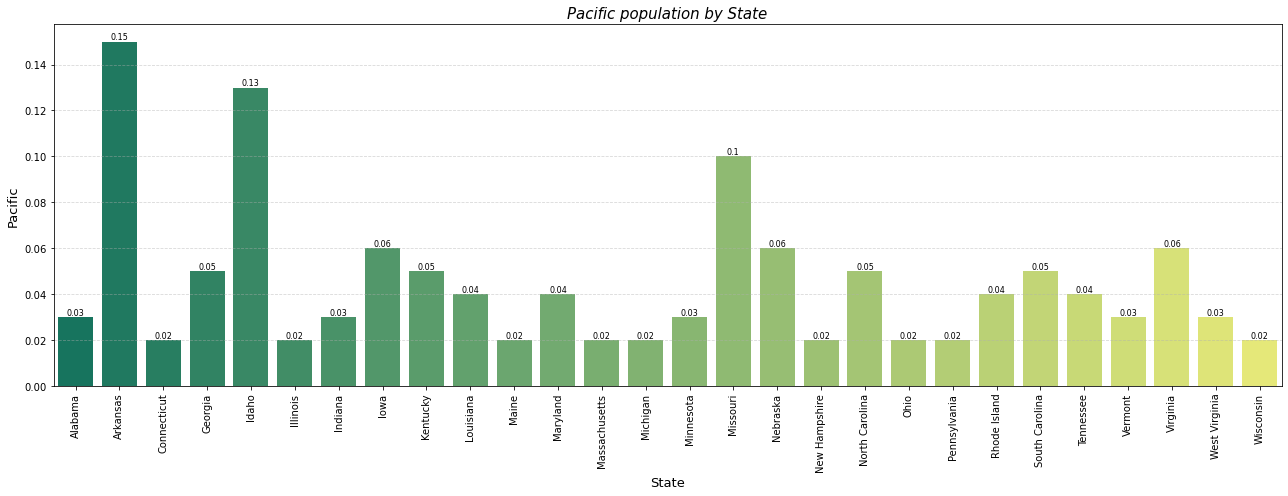

In [83]:
race_vs_state(df_cleaned)

## Barplot of population of every race before outliers were removed

**Observations before removing outliers**
<br><br>State with **maximum Hispanic** population : **Puerto Rico**
<br><br>State with **minimum Hispanic** population : **West Virginia**
<br><br>State with **maximum White** population : **Vermont**
<br><br>State with **minimum White** population : **Puerto Rico**
<br><br>State with **maximum Black** population : **District of Columbia**
<br><br>State with **minimum Black** population : **Puerto Rico**
<br><br>State with **maximum Native** population : **Alaska**
<br><br>State with **minimum Native** population : **Puerto Rico**
<br><br>State with **maximum Asian** population : **Hawaii**
<br><br>State with **minimum Asian** population : **Puerto Rico**I
<br><br>State with **maximum Pacific** population : **Hawaii**
<br><br>State with **minimum Pacific** population : **Puerto Rico**

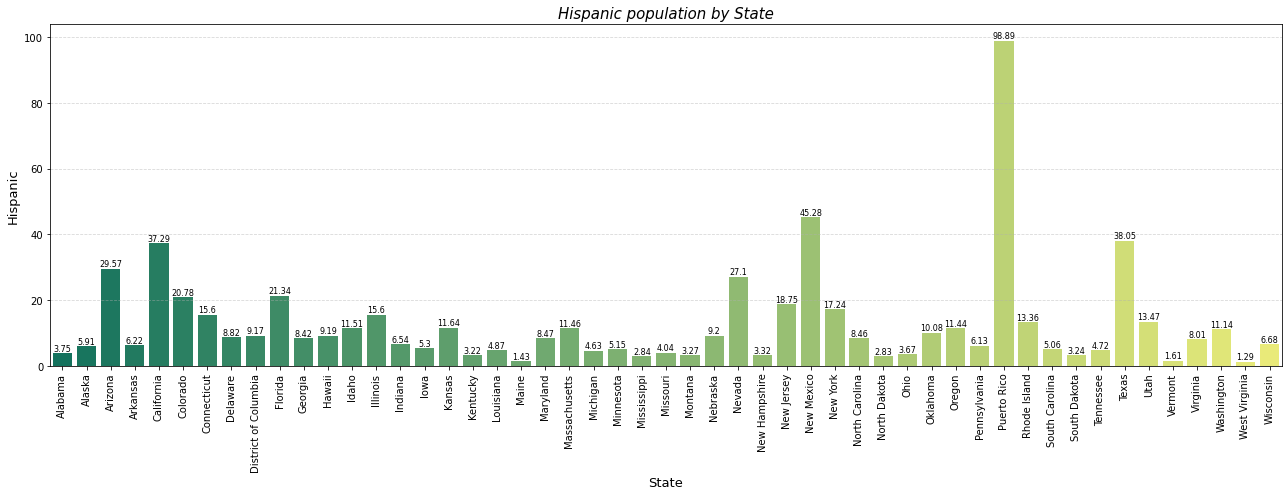

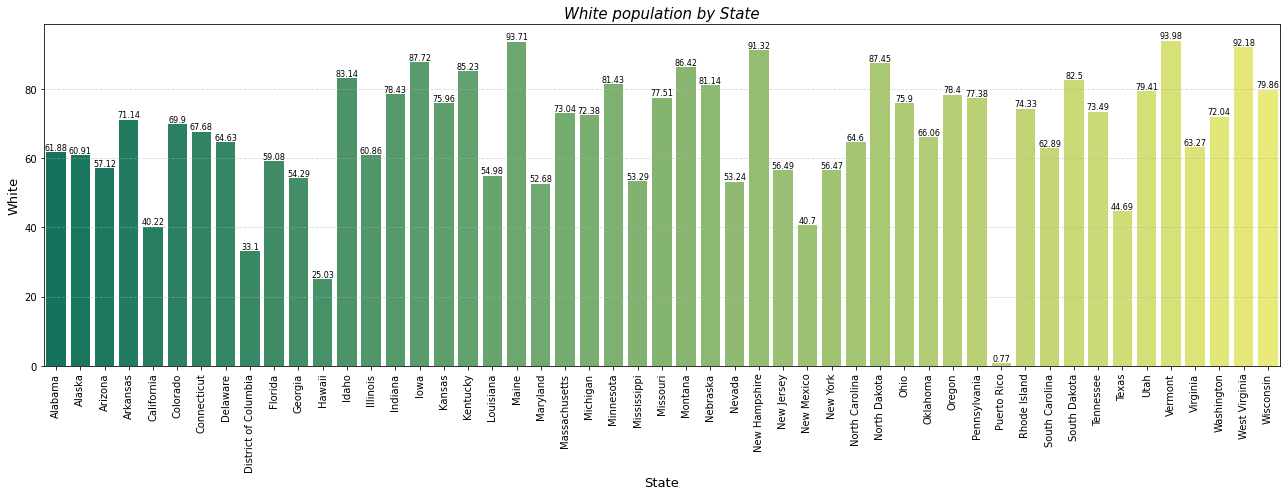

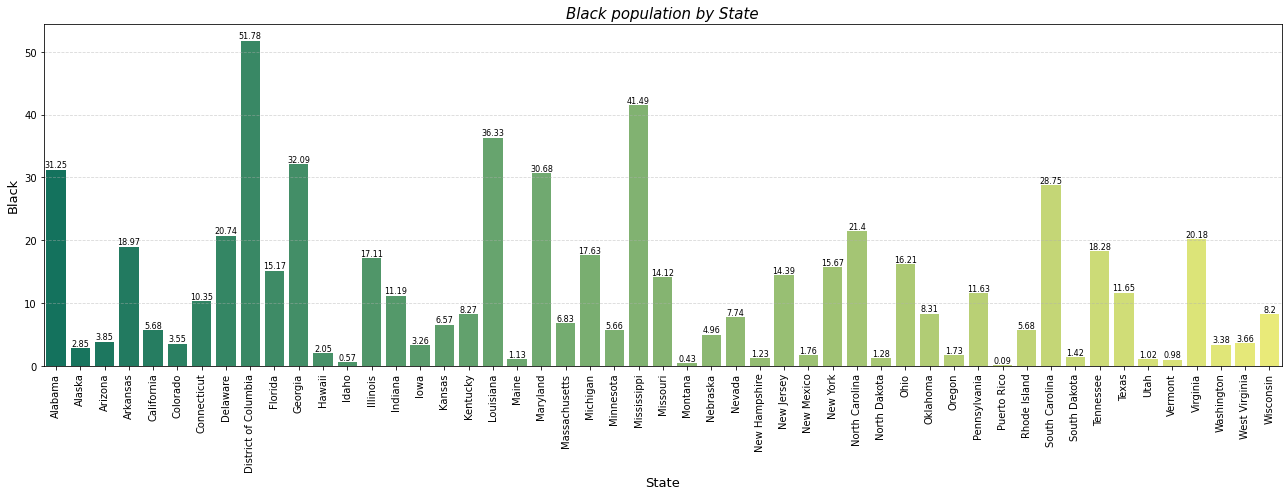

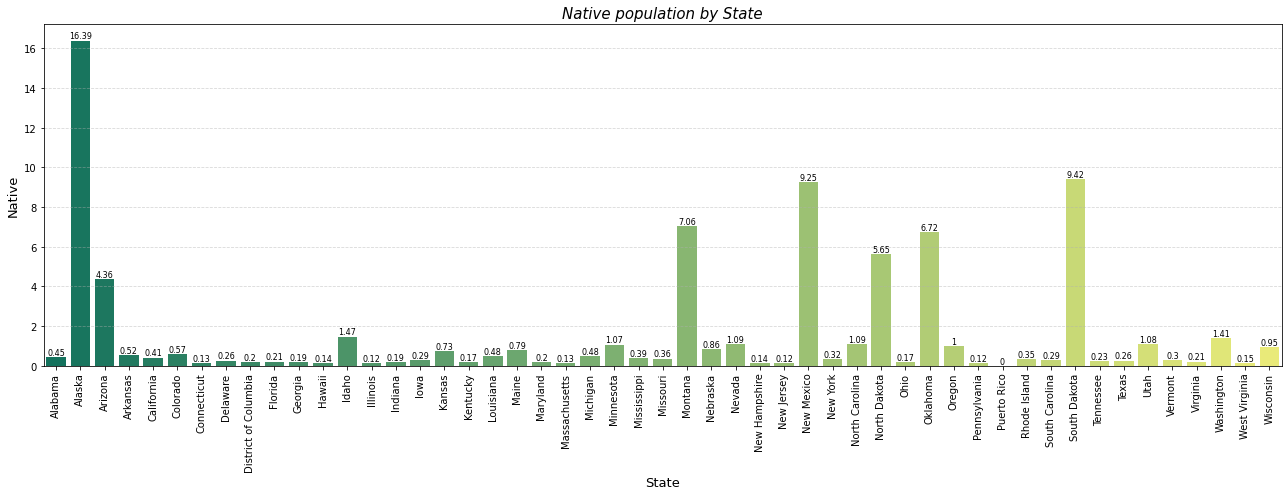

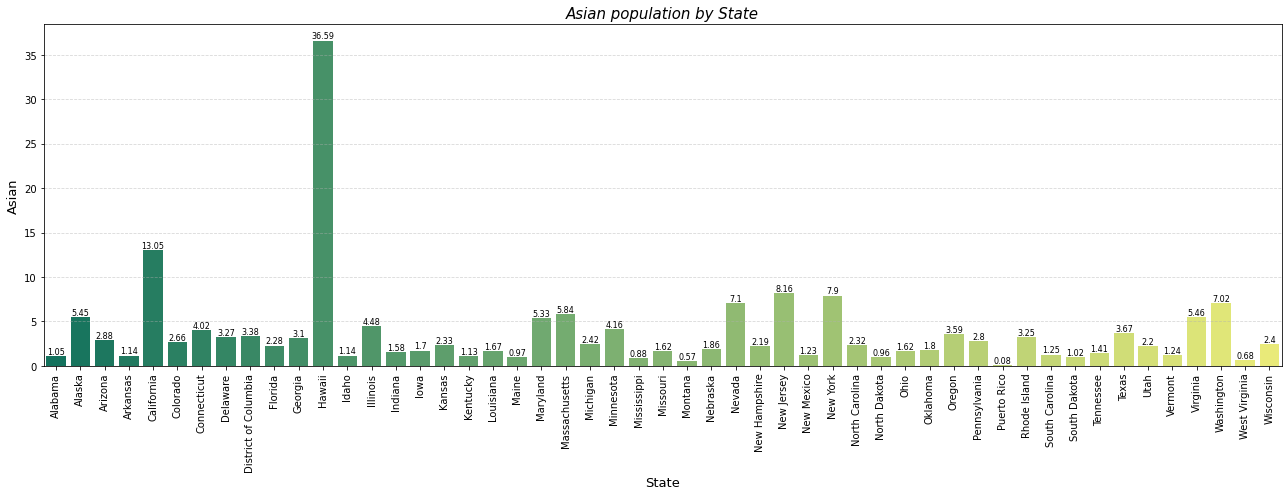

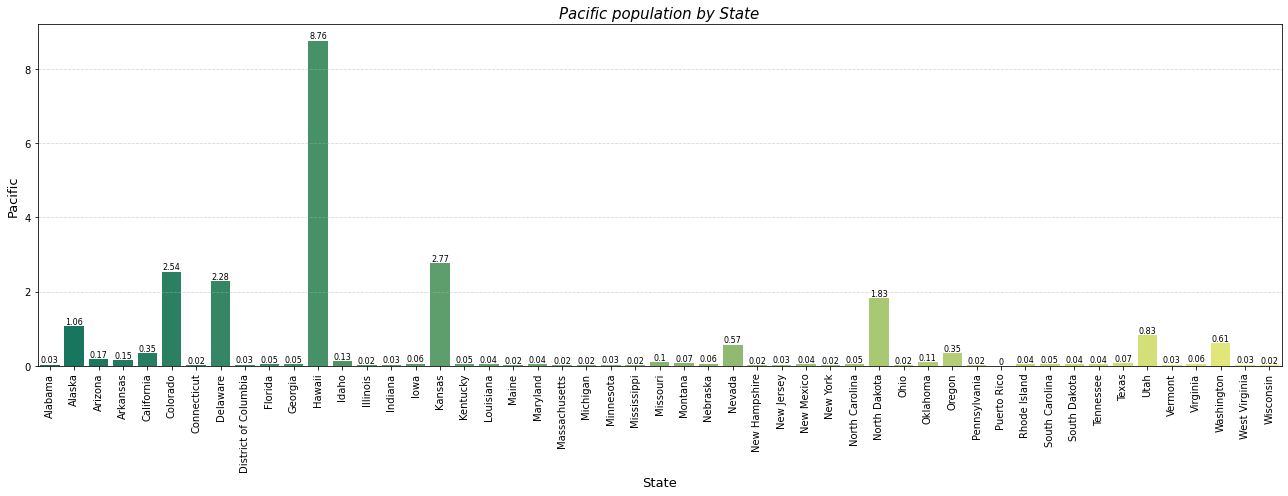

In [84]:
race_vs_state(new_df)

**Plot a line chart to visualize average income by state**

In [49]:
#Function to visualize average income in all states
def average_income_by_state(x,y):
    fig = plt.figure(figsize = (18,7))
    plt.plot(x,y,marker = 'o',linestyle = '--',markeredgecolor = 'black',ms = 5,mfc = 'black') #plot line chart
    plt.xticks(rotation = 90)
    plt.xlabel('State',fontsize = 13)
    plt.ylabel('Average Income($)',fontsize = 13)
    plt.title('Average Income by State',fontstyle = 'italic',fontsize = 15)
    plt.grid(axis = 'y',linestyle = '--',alpha = 0.5)
    plt.show()

## Line chart for average income by state after removing the outliers

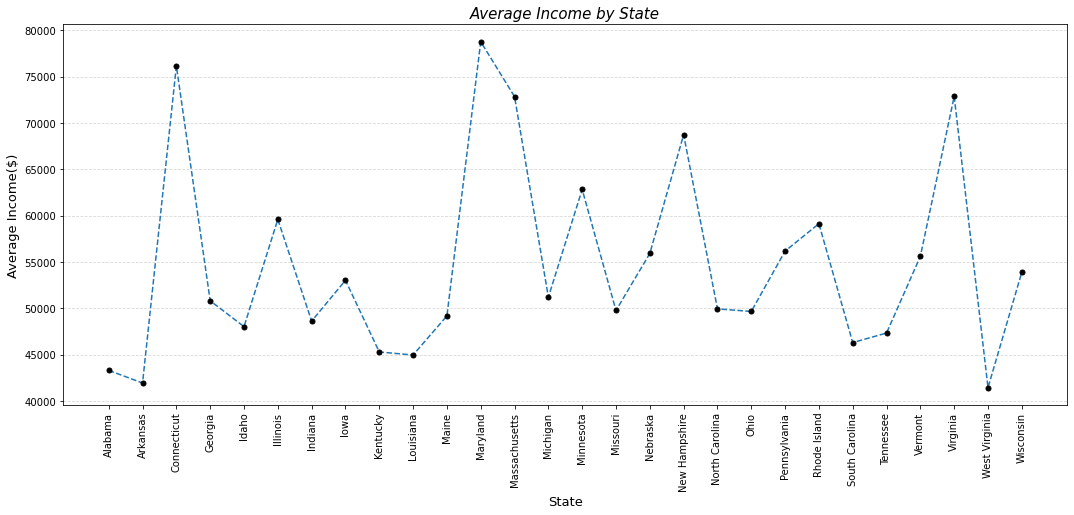

Maximum Average Income: 78765.4
Minimum Average Income: 41437.11


In [50]:
average_income_by_state(df_cleaned.State,df_cleaned.Income)
print(f'Maximum Average Income: {df_cleaned.Income.max()}')
print(f'Minimum Average Income: {df_cleaned.Income.min()}')

## Line chart for average income by state before removing the outliers

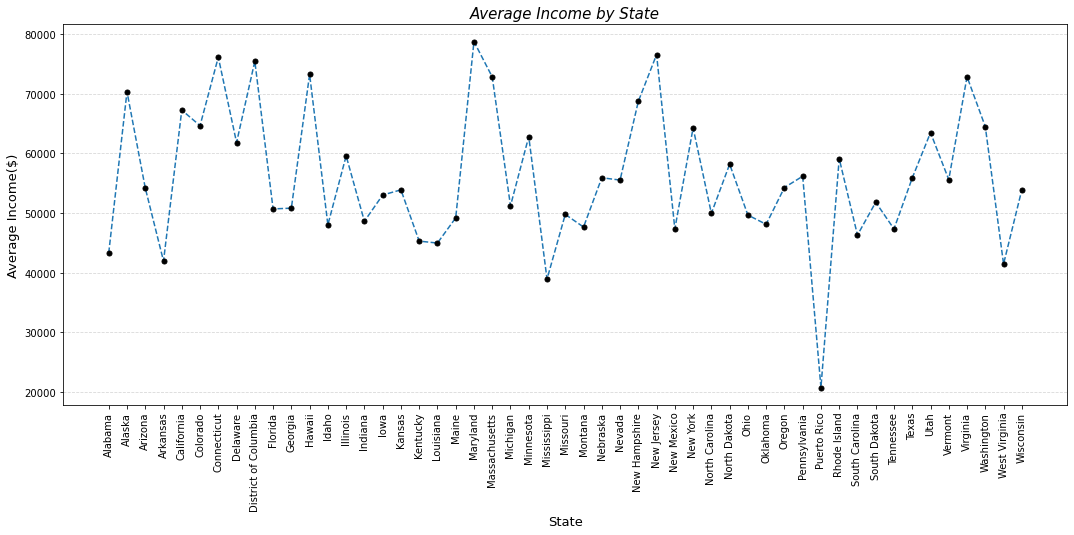

Maximum Average Income: 78765.4
Minimum Average Income: 20720.54


In [51]:
average_income_by_state(new_df.State,new_df.Income)
print(f'Maximum Average Income: {new_df.Income.max()}')
print(f'Minimum Average Income: {new_df.Income.min()}')

In [52]:
#Function to visualize total population by state
def total_population_by_state(x,y):
    fig = plt.figure(figsize = (18,7))
    plt.plot(x,y,color = 'red',marker = 'o',linestyle = '--',markeredgecolor = 'black',ms = 5,mfc = 'black')
    plt.xticks(rotation = 90)
    plt.title('Total Population by State',fontstyle = 'italic',fontsize = 15)
    plt.xlabel('State',fontsize = 13)
    plt.ylabel('Total Population',fontsize = 13)
    plt.grid(axis = 'y',linestyle = '--',alpha = 0.5)
    plt.show()

## Line Chart demonstrating total population by state after removal of outliers

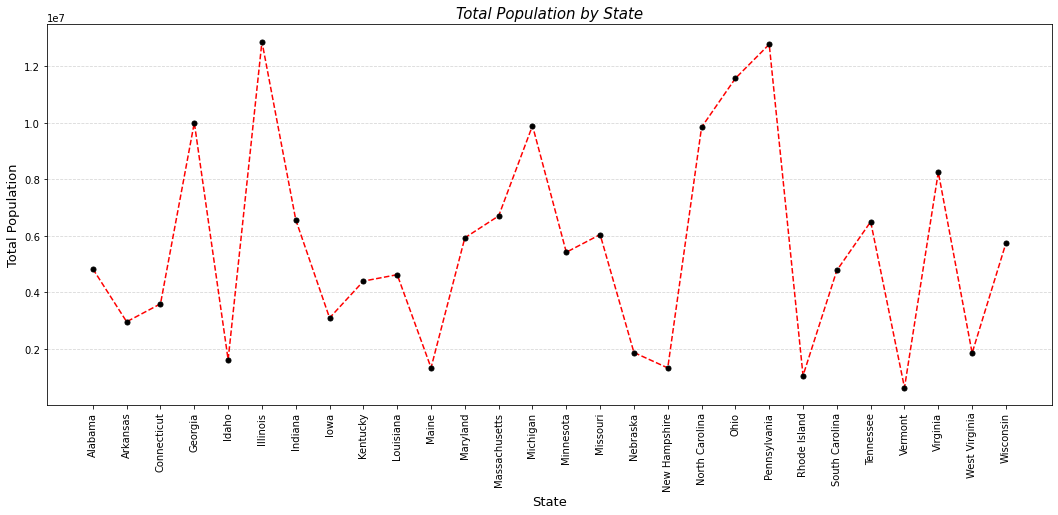

Maximum Total Population: 12873761
Minimum Total Population: 626604


In [53]:
total_population_by_state(df_cleaned.State,df_cleaned.Total_Population)
print(f'Maximum Total Population: {df_cleaned.Total_Population.max()}')
print(f'Minimum Total Population: {df_cleaned.Total_Population.min()}')

## Line Chart demonstrating total population by state before removal of outliers

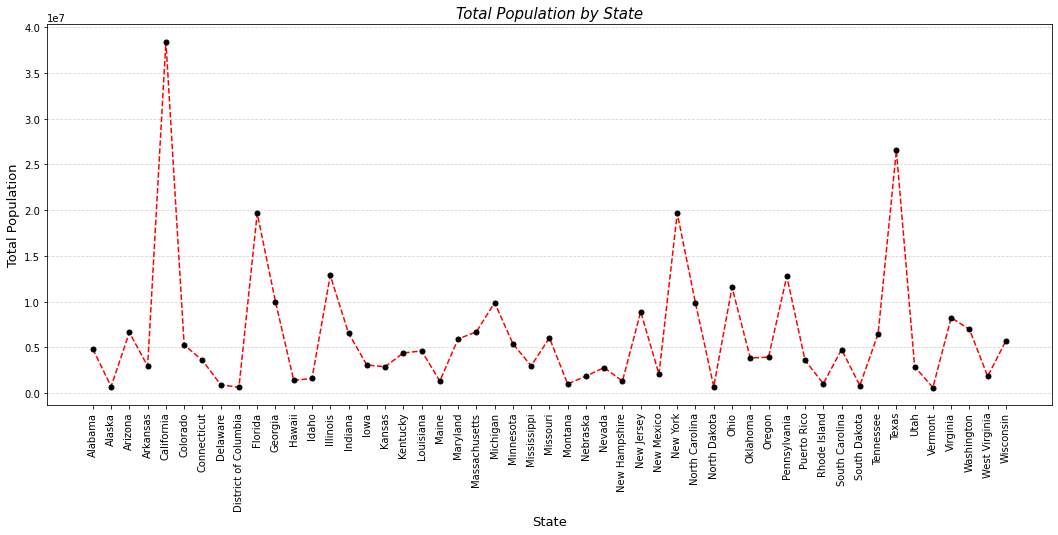

Maximum Total Population: 38421464
Minimum Total Population: 626604


In [54]:
total_population_by_state(new_df.State,new_df.Total_Population)
print(f'Maximum Total Population: {new_df.Total_Population.max()}')
print(f'Minimum Total Population: {new_df.Total_Population.min()}')

In [55]:
#Function fo visualizing Female and Male population by state
def female_male_population_by_state(x,y,z):
    fig = plt.figure(figsize = (18,7))
    plt.plot(x,y,color = 'pink',marker = 'o',linestyle = '--',markeredgecolor = 'red',ms = 5,mfc = 'red')
    plt.plot(x,z,color = 'blue',marker = 'o',linestyle = '--',markeredgecolor = 'black',ms = 5,mfc = 'purple')
    plt.title('Female & Male Population by State',fontstyle = 'italic',fontsize = 15)
    plt.xlabel('State',fontsize = 13)
    plt.ylabel('Total Population',fontsize = 13)
    plt.grid(axis = 'y',linestyle = '--',alpha = 0.5)
    plt.xticks(rotation = 90)
    plt.show()

## Line Chart demonstrating female and male population by state after removal of outliers

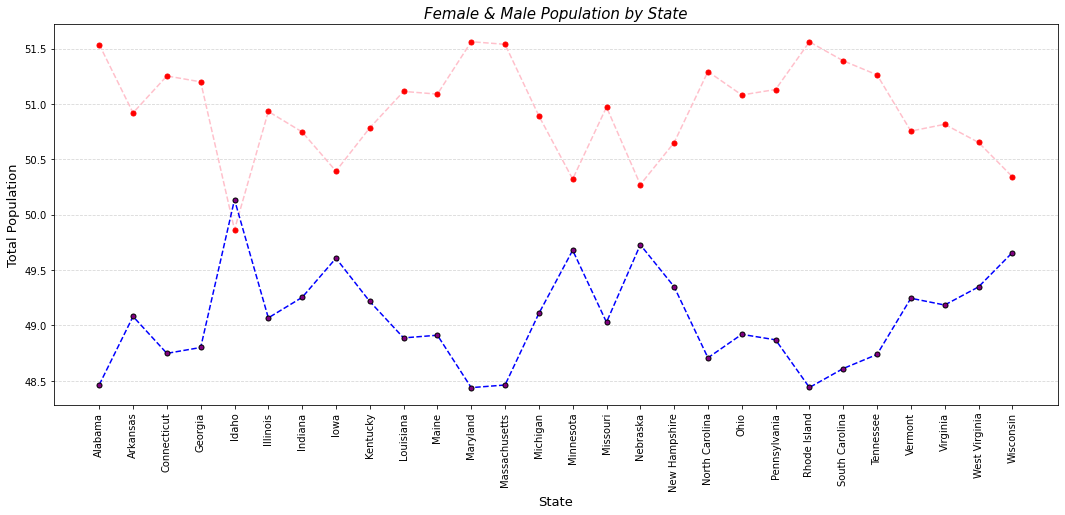

Maximum Female Population: 51.561848183082205
Minimum Female Population: 49.86449512448447
Maximum Male Population: 50.13550487551552
Minimum Male Population: 48.43815181691779


In [56]:
female_male_population_by_state(df_cleaned.State,df_cleaned.Female,df_cleaned.Male)
print(f'Maximum Female Population: {df_cleaned.Female.max()}')
print(f'Minimum Female Population: {df_cleaned.Female.min()}')

print(f'Maximum Male Population: {df_cleaned.Male.max()}')
print(f'Minimum Male Population: {df_cleaned.Male.min()}')

## Line Chart demonstrating female and male population by state before removal of outliers

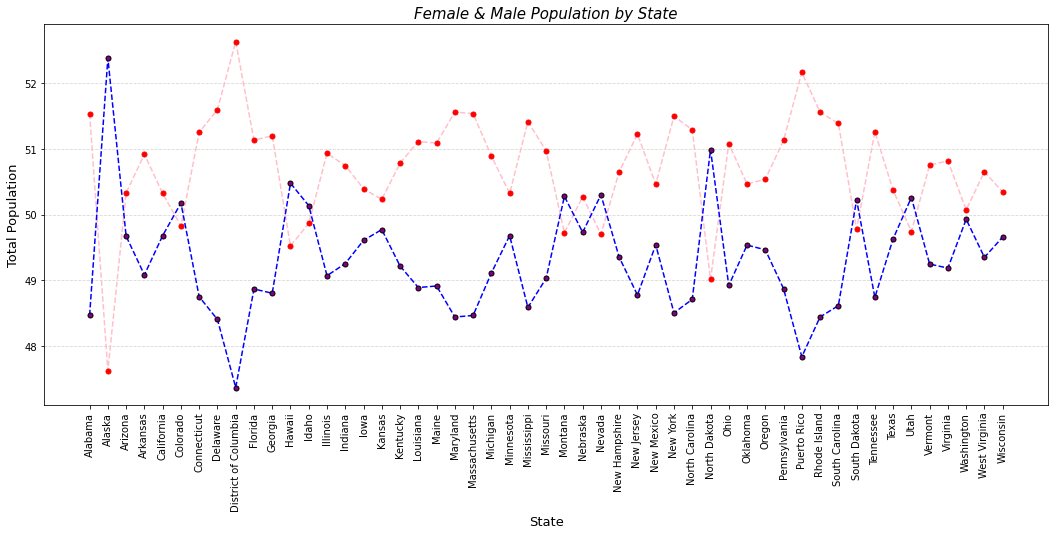

Maximum Female Population: 52.63604969389205
Minimum Female Population: 47.61752173171978
Maximum Male Population: 52.38247826828021
Minimum Male Population: 47.36395030610795


In [57]:
female_male_population_by_state(new_df.State,new_df.Female,new_df.Male)
print(f'Maximum Female Population: {new_df.Female.max()}')
print(f'Minimum Female Population: {new_df.Female.min()}')

print(f'Maximum Male Population: {new_df.Male.max()}')
print(f'Minimum Male Population: {new_df.Male.min()}')

In [58]:
#Function to create a scatterplot for female population by income
def femalepop_vs_income(x,y,z):    
    fig = plt.figure(figsize = (18,7))
    
    sns.scatterplot(x,y,data = df_cleaned,hue = z,size = z, legend = False)
    
    plt.title('Female Population vs Income',fontstyle = 'italic',fontsize = 15)
    
    plt.xlabel('Female Population per State (%) ',fontsize = 13)
    
    plt.ylabel('Average Income($)',fontsize = 13)
    
    plt.grid(axis = 'y',linestyle = '--',alpha = 0.5)
    
    #plt.legend(title='State', fontsize='small', title_fontsize='medium',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    plt.show()
    

#Function to create a scatter plot for male population by income 
def malepop_vs_income(a,b,c): 
    fig = plt.figure(figsize = (18,7))
    
    sns.scatterplot(a,b,data = df_cleaned,hue = c,size = c,legend = False)
    
    plt.title('Male Population vs Income',fontstyle = 'italic',fontsize = 15)
    
    plt.xlabel('Male Population per State(%)',fontsize = 13)
    
    plt.ylabel('Average Income($)',fontsize = 13)
    
    plt.grid(axis = 'y',linestyle = '--',alpha = 0.5)
    
    #plt.legend(title='State', fontsize='small', title_fontsize='medium',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    plt.show()

## Scatter plot to visualize female population vs income after removal of outliers

From the scatterplot below, the following consclusions were drawn:<br>
    1. The range (50.50% - 51.25%) shows the maximum frequency of female population earning in the range of ($40,000 - $55,000).<br><br>
    2. We can also conculde that there is no strong relationship between Average Income and Female Population.<br><br>
    3. The frequency of female population earning over an average income of $65,000 is less.

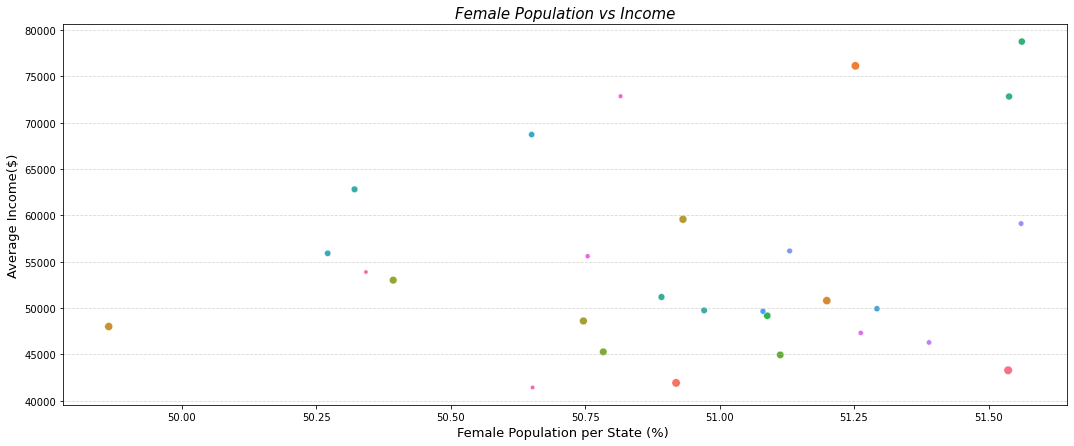

In [59]:
femalepop_vs_income(df_cleaned.Female,df_cleaned.Income,df_cleaned.State)

## Scatter plot to visualize female population vs income before removal of outliers

From the scatterplot below, the following consclusions were drawn:<br>
    1. The range (49.50% - 52%) shows the maximum frequency of female population earning in the range of ($40,000 - $60,000).<br><br>
    2. The range (60,000 - 70,000) and (70,000 - 80,000) has an equal frequency<br><br>

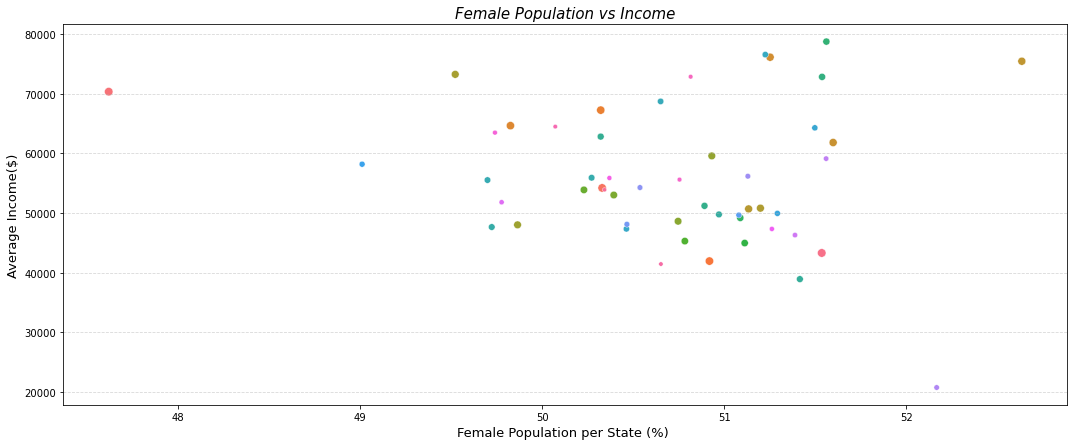

In [60]:
femalepop_vs_income(new_df.Female,new_df.Income,new_df.State)

## Scatter plot to visualize male population vs income after removal of outliers

From the scatterplot below, the following consclusions were drawn:<br>
    1. The range (47.50% - 49.25%) shows the maximum frequency of male population earning in the range of ($40,000 - $55,000).<br><br>
    2. The range (70,000 - 75,000) and (75,000 - 80,000) has an equal frequency<br><br>
    3. There is no strong relationship between male population and average income

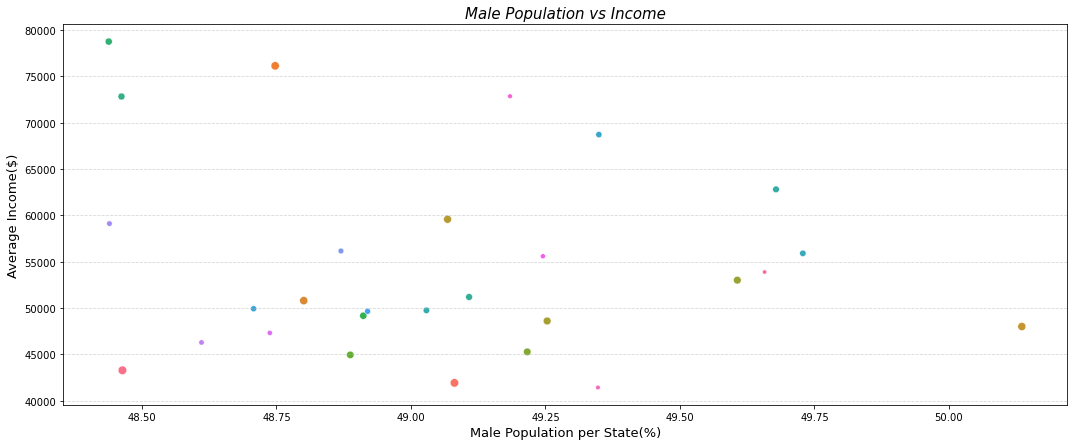

In [61]:
malepop_vs_income(df_cleaned.Male,df_cleaned.Income,df_cleaned.State)

## Scatter plot to visualize female population vs income before removal of outliers

From the scatterplot below, the following consclusions were drawn:<br>
    1. The range (48% - 51%) shows the maximum frequency of male population earning in the range of ($40,000 - $60,000).<br><br>
    2. The frequency of population with average income($60,000 - $70,000) and ($70,000 - $80,000) is more than the scenario when outliers are removed <br><br>

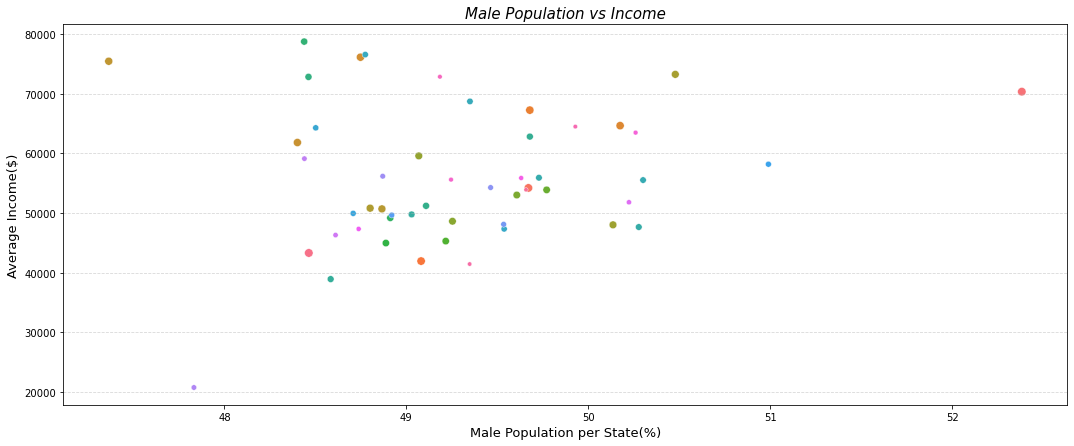

In [101]:
malepop_vs_income(new_df.Male,new_df.Income,new_df.State)

## Correlation Analysis

In [113]:
corr = df_cleaned.corr()
corr.style.background_gradient(cmap = 'plasma')

,Total_Population,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
Total_Population,1.000000,0.196796,-0.516382,0.462876,-0.240044,0.380016,-0.264784,0.063843,-0.277944,0.277944
Hispanic,0.196796,1.000000,-0.448641,0.037216,0.042251,0.621607,0.068888,0.505881,-0.127770,0.127770
White,-0.516382,-0.448641,1.000000,-0.902855,0.164700,-0.458215,-0.031780,-0.176439,0.573196,-0.573196
Black,0.462876,0.037216,-0.902855,1.000000,-0.205633,0.134202,0.035117,-0.119236,-0.573755,0.573755
Native,-0.240044,0.042251,0.164700,-0.205633,1.000000,-0.213320,0.370862,-0.229910,0.514390,-0.514390
Asian,0.380016,0.621607,-0.458215,0.134202,-0.213320,1.000000,-0.268919,0.863471,-0.274467,0.274467
Pacific,-0.264784,0.068888,-0.031780,0.035117,0.370862,-0.268919,1.000000,-0.311902,0.304414,-0.304414
Income,0.063843,0.505881,-0.176439,-0.119236,-0.229910,0.863471,-0.311902,1.000000,-0.158683,0.158683
Male,-0.277944,-0.127770,0.573196,-0.573755,0.514390,-0.274467,0.304414,-0.158683,1.000000,-1.000000
Female,0.277944,0.127770,-0.573196,0.573755,-0.514390,0.274467,-0.304414,0.158683,-1.000000,1.000000


We found a strong correlation between Income and the Asian population. Also the correlation between hispanic and asian popultaion is fairly strong

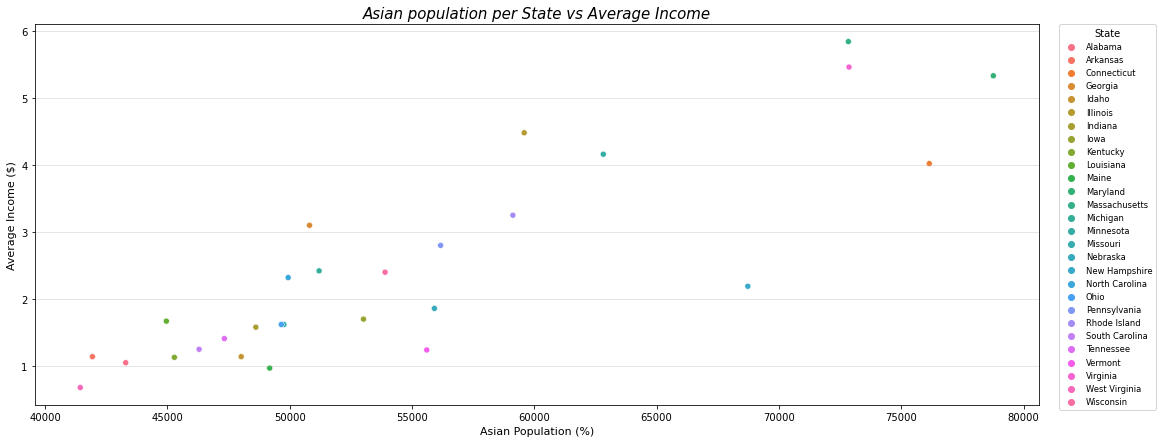

In [131]:
#Using scatterplot to justify the a strong correlation between Asian Population and Income

fig = plt.figure(figsize = (18,7))
sns.scatterplot(df_cleaned.Income,df_cleaned.Asian,hue = df_cleaned.State)
plt.legend(title='State', fontsize='small', title_fontsize='medium',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid(axis = 'y',alpha = 0.4)
plt.title('Asian population per State vs Average Income',fontstyle = 'italic',fontsize = 15)
plt.xlabel('Asian Population (%)',fontsize = 11)
plt.ylabel('Average Income ($)',fontsize = 11)
plt.show()

The Asian population's average income almost increases linearly across every state in our dataset. Hence a strong indication of positive correlation.

In [66]:
df_cleaned.to_csv('US_census_clean.csv',index = False)